## Relaince- Data Analyst Test


#### Guided Steps

- Understanding the Problem Statement
- Data Checks to perform
- Data Cleaning
- Exploratory data analysis
- Data Pre-Processing


### 1) Problem statement
You are a Data Analyst working with the product team in charge of our Customer Care, among others the this team ensures that our self-service knowledge base is useful to our customers.

The knowledge base is a wiki site that contains articles around a broad set of topics, from general health to how to guides. Users navigate it using a search page which presents results ordered by an algorithm.

The Data Team uses Event logging (EL) to track a variety of performance and usage metrics to help on the decision making process.Specifically, the most used metrics are:

-A) clickthrough rate (CR) calculated as the proportion of search sessions where the user clicked on one of the results displayed.

-B) zero results rate (ZRR) calculated as the proportion of searches that yielded 0 results and other metrics outside the scope of this task. EL uses JavaScript to asynchronously send messages (events) to the servers when the user has performed specific actions. In this task, you will analyse a subset of our event logs.

The engineering team has been worked the site to improve the user experience, this change was tested in group B of the dataset below.

The Product Manager of the team comes to you on your weekly catch up and asks you too check whether the changes made have had a significant impact on user behaviour.



### 2) Data Collection
- Dataset Source - C:\Reliance_Health_Assessment\Reliance_Health\notebook\input_data\events_log_2.csv
- The data consists of 9 column and 400165 rows.

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [77]:
events= pd.read_csv('events_log_2.csv') # read the data
# df['timestamp'] = df['timestamp'].astype(int)
# pd.DataFrame.to_csv(df,'events_log_.csv')
events.info() # check the data structure
print(events.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400165 entries, 0 to 400164
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   uuid             400165 non-null  object 
 1   timestamp        400165 non-null  float64
 2   session_id       400165 non-null  object 
 3   group            400165 non-null  object 
 4   action           400165 non-null  object 
 5   checkin          223824 non-null  float64
 6   page_id          400165 non-null  object 
 7   n_results        136234 non-null  float64
 8   result_position  230482 non-null  float64
dtypes: float64(4), object(5)
memory usage: 27.5+ MB
                               uuid     timestamp        session_id group  \
0  00000736167c507e8ec225bd9e71f9e5  2.016030e+13  78245c2c3fba013a     b   
1  00000c69fe345268935463abbfa5d5b3  2.016031e+13  c559c3be98dca8a4     a   
2  00003bfdab715ee59077a3670331b787  2.016030e+13  760bf89817ce4b08     a   
3  0000465cd

In [78]:
events['timestamp'] = events['timestamp'].astype(int) #converting the timestamp to integers
events.head()

,uuid,timestamp,session_id,group,action,checkin,page_id,n_results,result_position
0,00000736167c507e8ec225bd9e71f9e5,-2147483648,78245c2c3fba013a,b,searchResultPage,NaN,cbeb66d1bc1f1bc2,5.0,NaN
1,00000c69fe345268935463abbfa5d5b3,-2147483648,c559c3be98dca8a4,a,searchResultPage,NaN,eb658e8722aad674,10.0,NaN
2,00003bfdab715ee59077a3670331b787,-2147483648,760bf89817ce4b08,a,checkin,30.0,f99a9fc1f7fdd21e,NaN,NaN
3,0000465cd7c35ad2bdeafec953e08c1a,-2147483648,fb905603d31b2071,a,checkin,60.0,e5626962a6939a75,NaN,10.0
4,000050cbb4ef5b42b16c4d2cf69e6358,-2147483648,c2bf5e5172a892dc,a,checkin,30.0,787dd6a4c371cbf9,NaN,NaN


In [79]:
pd.DataFrame.to_csv(events,'events_log_.csv')

In [80]:
event_df = pd.read_csv('events_log_.csv', parse_dates=['timestamp'], index_col='timestamp')
event_df.head()

,Unnamed: 0,uuid,session_id,group,action,checkin,page_id,n_results,result_position
timestamp,,,,,,,,,
-2147483648,0,00000736167c507e8ec225bd9e71f9e5,78245c2c3fba013a,b,searchResultPage,NaN,cbeb66d1bc1f1bc2,5.0,NaN
-2147483648,1,00000c69fe345268935463abbfa5d5b3,c559c3be98dca8a4,a,searchResultPage,NaN,eb658e8722aad674,10.0,NaN
-2147483648,2,00003bfdab715ee59077a3670331b787,760bf89817ce4b08,a,checkin,30.0,f99a9fc1f7fdd21e,NaN,NaN
-2147483648,3,0000465cd7c35ad2bdeafec953e08c1a,fb905603d31b2071,a,checkin,60.0,e5626962a6939a75,NaN,10.0
-2147483648,4,000050cbb4ef5b42b16c4d2cf69e6358,c2bf5e5172a892dc,a,checkin,30.0,787dd6a4c371cbf9,NaN,NaN


In [81]:
# drop the Unnamed column
event_df.drop(event_df.columns[event_df.columns.str.contains('Unnamed',case=False)],axis=1, inplace=True)
event_df.head()

,uuid,session_id,group,action,checkin,page_id,n_results,result_position
timestamp,,,,,,,,
-2147483648,00000736167c507e8ec225bd9e71f9e5,78245c2c3fba013a,b,searchResultPage,NaN,cbeb66d1bc1f1bc2,5.0,NaN
-2147483648,00000c69fe345268935463abbfa5d5b3,c559c3be98dca8a4,a,searchResultPage,NaN,eb658e8722aad674,10.0,NaN
-2147483648,00003bfdab715ee59077a3670331b787,760bf89817ce4b08,a,checkin,30.0,f99a9fc1f7fdd21e,NaN,NaN
-2147483648,0000465cd7c35ad2bdeafec953e08c1a,fb905603d31b2071,a,checkin,60.0,e5626962a6939a75,NaN,10.0
-2147483648,000050cbb4ef5b42b16c4d2cf69e6358,c2bf5e5172a892dc,a,checkin,30.0,787dd6a4c371cbf9,NaN,NaN


In [82]:
event_df.index = pd.to_datetime(event_df.index)
# events['timestamp'] = pd.to_datetime(events['timestamp'])
event_df.head()

,uuid,session_id,group,action,checkin,page_id,n_results,result_position
timestamp,,,,,,,,
1969-12-31 23:59:57.852516352,00000736167c507e8ec225bd9e71f9e5,78245c2c3fba013a,b,searchResultPage,NaN,cbeb66d1bc1f1bc2,5.0,NaN
1969-12-31 23:59:57.852516352,00000c69fe345268935463abbfa5d5b3,c559c3be98dca8a4,a,searchResultPage,NaN,eb658e8722aad674,10.0,NaN
1969-12-31 23:59:57.852516352,00003bfdab715ee59077a3670331b787,760bf89817ce4b08,a,checkin,30.0,f99a9fc1f7fdd21e,NaN,NaN
1969-12-31 23:59:57.852516352,0000465cd7c35ad2bdeafec953e08c1a,fb905603d31b2071,a,checkin,60.0,e5626962a6939a75,NaN,10.0
1969-12-31 23:59:57.852516352,000050cbb4ef5b42b16c4d2cf69e6358,c2bf5e5172a892dc,a,checkin,30.0,787dd6a4c371cbf9,NaN,NaN


## 1. What is the daily overall clickthrough rate? How does it vary between the groups?

##### Daily clickthrough rate is calculated as a proportion:
##### ClickThroughRate = clickedResults / allSearchResults


In [91]:
overall_daily_ctr=len(event_df['action'][event_df['action'] == 'visitPage']) / len(event_df['action'][event_df['action'] == 'searchResultPage'])
overall_daily_ctr

0.294397874245783

### Clickthrough Rate by Groups

In [86]:
group_daily_ctr = event_df.groupby(['timestamp', 'group']).apply(lambda x: (x['action'] == 'visitPage').sum() / (x['action'] == 'searchResultPage').sum())
group_daily_ctr 

timestamp                      group
1969-12-31 23:59:57.852516352  a        0.361356
                               b        0.154873
dtype: float64

In [87]:
daily_ctr_a = 0.361356 # daily overall clickthrough rate for a
daily_ctr_b = 0.154873  # daily overall clickthrough rate for b

In [92]:
CRT = [overall_daily_ctr, daily_ctr_a, daily_ctr_b]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


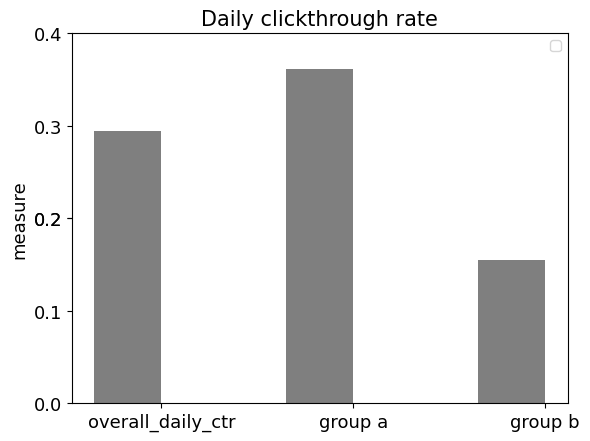

In [97]:
index = np.arange(3)
bar_width = 0.35

fig, ax = plt.subplots()
rects = ax.bar(range(len(CRT)), CRT, bar_width, color='k', alpha=0.5,  error_kw=dict(ecolor='black', lw=2, capsize=5, capthick=2))

plt.title('Daily clickthrough rate', size=15)

plt.ylabel('measure', size=13)

plt.xticks(index + bar_width / 2, ('overall_daily_ctr', 'group a','group b'), size =13)
plt.yticks(np.round(np.linspace(0,max(CRT)+0.05,6),1),  size =13)
plt.legend()

 ## What is the daily overall zero results rate? How does it vary between the groups? Is there a statistically significant difference?

 ##### Zero results rate (ZRR):  calculated as the proportion of searches that yielded 0 results

In [98]:
zero_results_a=[]
zero_results_b=[]
for i, d in event_df.groupby([event_df.index,event_df.group]):
    if d['group'].iloc[0]=='a':
        zero_results_a.append(len(d['n_results'][d['n_results'] == 0]) / len(d['action'][d['action'] == 'searchResultPage']))
    else:
        zero_results_b.append(len(d['n_results'][d['n_results'] == 0]) / len(d['action'][d['action'] == 'searchResultPage']))

In [99]:
zero_results_b, zero_results_a

([0.1861786409525103], [0.1836056313548275])

In [100]:
zero_results_b = 0.1861786409525103
zero_results_a = 0.1836056313548275

## Is there a statistically significant difference?

In [101]:
from scipy.stats import ttest_ind  # import ttest_ind for the statistical test

In [102]:
# Perform the t-test
t_stat, p_value = ttest_ind(zero_results_a, zero_results_b)

# Output the results
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("The difference between the groups is statistically significant.")
else:
    print("The difference between the groups is not statistically significant.")


T-statistic: nan, P-value: nan
The difference between the groups is not statistically significant.


# Session Length
Let session length be approximately the time between the first event and the last event in a session. Choose a variable from the dataset and describe its relationship to session length. Visualize the relationship.

In [104]:
begin_first_action = event_df.sort_index().groupby(['session_id'], sort=True, as_index=False).nth(0).drop(['uuid','page_id'],axis=1)
begin_first_action.head()

,session_id,group,action,checkin,n_results,result_position
timestamp,,,,,,
1969-12-31 23:59:57.852516352,78245c2c3fba013a,b,searchResultPage,NaN,5.0,NaN
1969-12-31 23:59:57.852516352,c559c3be98dca8a4,a,searchResultPage,NaN,10.0,NaN
1969-12-31 23:59:57.852516352,760bf89817ce4b08,a,checkin,30.0,NaN,NaN
1969-12-31 23:59:57.852516352,fb905603d31b2071,a,checkin,60.0,NaN,10.0
1969-12-31 23:59:57.852516352,c2bf5e5172a892dc,a,checkin,30.0,NaN,NaN


In [105]:
begin_first_action['time'] = begin_first_action.index
begin_first_action.sort_values('session_id').head()

,session_id,group,action,checkin,n_results,result_position,time
timestamp,,,,,,,
1969-12-31 23:59:57.852516352,0000cbcb67c19c45,b,searchResultPage,NaN,20.0,NaN,1969-12-31 23:59:57.852516352
1969-12-31 23:59:57.852516352,0001382e027b2ea4,b,checkin,240.0,NaN,1.0,1969-12-31 23:59:57.852516352
1969-12-31 23:59:57.852516352,0001e8bb90445cb2,b,checkin,300.0,NaN,1.0,1969-12-31 23:59:57.852516352
1969-12-31 23:59:57.852516352,000216cf18ae1ab1,a,searchResultPage,NaN,20.0,NaN,1969-12-31 23:59:57.852516352
1969-12-31 23:59:57.852516352,000527f711d50dfc,b,searchResultPage,NaN,1.0,NaN,1969-12-31 23:59:57.852516352


In [107]:
last_action_end = event_df.sort_index().groupby(['session_id'], as_index=False, sort=True).nth(-1).drop(['page_id','uuid'],axis=1)

In [108]:
last_action_end['time'] = last_action_end.index
last_action_end.sort_values('session_id').head()

,session_id,group,action,checkin,n_results,result_position,time
timestamp,,,,,,,
1969-12-31 23:59:57.852516352,0000cbcb67c19c45,b,searchResultPage,NaN,20.0,NaN,1969-12-31 23:59:57.852516352
1969-12-31 23:59:57.852516352,0001382e027b2ea4,b,checkin,60.0,NaN,1.0,1969-12-31 23:59:57.852516352
1969-12-31 23:59:57.852516352,0001e8bb90445cb2,b,checkin,10.0,NaN,1.0,1969-12-31 23:59:57.852516352
1969-12-31 23:59:57.852516352,000216cf18ae1ab1,a,searchResultPage,NaN,20.0,NaN,1969-12-31 23:59:57.852516352
1969-12-31 23:59:57.852516352,000527f711d50dfc,b,searchResultPage,NaN,1.0,NaN,1969-12-31 23:59:57.852516352


In [109]:
session_strt_end = pd.merge(begin_first_action, last_action_end, on = ['session_id','group'], suffixes=('_first_action','_last_action'))
session_strt_end.head()

,session_id,group,action_first_action,checkin_first_action,n_results_first_action,result_position_first_action,time_first_action,action_last_action,checkin_last_action,n_results_last_action,result_position_last_action,time_last_action
0,78245c2c3fba013a,b,searchResultPage,NaN,5.0,NaN,1969-12-31 23:59:57.852516352,visitPage,NaN,NaN,3.0,1969-12-31 23:59:57.852516352
1,c559c3be98dca8a4,a,searchResultPage,NaN,10.0,NaN,1969-12-31 23:59:57.852516352,searchResultPage,NaN,20.0,NaN,1969-12-31 23:59:57.852516352
2,760bf89817ce4b08,a,checkin,30.0,NaN,NaN,1969-12-31 23:59:57.852516352,checkin,120.0,NaN,1.0,1969-12-31 23:59:57.852516352
3,fb905603d31b2071,a,checkin,60.0,NaN,10.0,1969-12-31 23:59:57.852516352,visitPage,NaN,NaN,10.0,1969-12-31 23:59:57.852516352
4,c2bf5e5172a892dc,a,checkin,30.0,NaN,NaN,1969-12-31 23:59:57.852516352,visitPage,NaN,NaN,NaN,1969-12-31 23:59:57.852516352


In [110]:
session_strt_end['session_length'] = session_strt_end['time_last_action'] - session_strt_end['time_first_action']

In [111]:
session_strt_end.head()

,session_id,group,action_first_action,checkin_first_action,n_results_first_action,result_position_first_action,time_first_action,action_last_action,checkin_last_action,n_results_last_action,result_position_last_action,time_last_action,session_length
0,78245c2c3fba013a,b,searchResultPage,NaN,5.0,NaN,1969-12-31 23:59:57.852516352,visitPage,NaN,NaN,3.0,1969-12-31 23:59:57.852516352,0 days
1,c559c3be98dca8a4,a,searchResultPage,NaN,10.0,NaN,1969-12-31 23:59:57.852516352,searchResultPage,NaN,20.0,NaN,1969-12-31 23:59:57.852516352,0 days
2,760bf89817ce4b08,a,checkin,30.0,NaN,NaN,1969-12-31 23:59:57.852516352,checkin,120.0,NaN,1.0,1969-12-31 23:59:57.852516352,0 days
3,fb905603d31b2071,a,checkin,60.0,NaN,10.0,1969-12-31 23:59:57.852516352,visitPage,NaN,NaN,10.0,1969-12-31 23:59:57.852516352,0 days
4,c2bf5e5172a892dc,a,checkin,30.0,NaN,NaN,1969-12-31 23:59:57.852516352,visitPage,NaN,NaN,NaN,1969-12-31 23:59:57.852516352,0 days
